In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures


from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel

In [213]:
df = pd.read_csv('train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [215]:
#Null Value Check
df.isna().sum()[df.isna().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [216]:
#Univariate Analysis

In [217]:
#Dont need id 
df.drop(columns=['Id'], inplace=True)

<AxesSubplot:xlabel='MSSubClass', ylabel='count'>

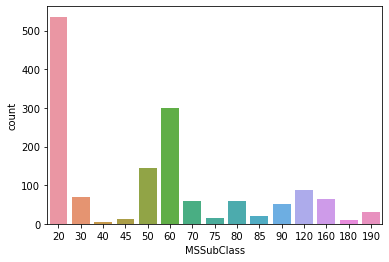

In [218]:
sns.countplot(df['MSSubClass'])

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

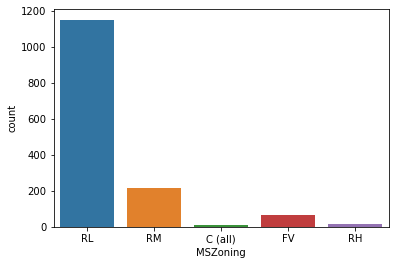

In [219]:
sns.countplot(df['MSZoning'])

<AxesSubplot:xlabel='LotFrontage'>

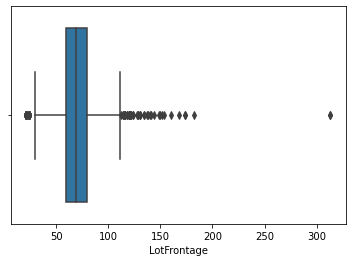

In [220]:
sns.boxplot(df['LotFrontage'])

In [221]:
#Delete more than 150
iqr = df['LotFrontage'].quantile(0.75) - df['LotFrontage'].quantile(0.25)
lq = df['LotFrontage'].quantile(0.25) - 1.5*iqr
uq = df['LotFrontage'].quantile(0.75) + 1.5*iqr
df = df[(df['LotFrontage'] >= lq) & (df['LotFrontage'] <= uq)]

<AxesSubplot:xlabel='LotArea'>

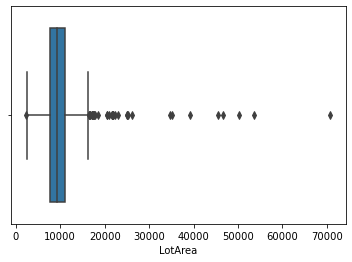

In [222]:
sns.boxplot(df['LotArea'])

In [223]:
iqr = df['LotArea'].quantile(0.75) - df['LotArea'].quantile(0.25)
lq = df['LotArea'].quantile(0.25) - 1.5*iqr
uq = df['LotArea'].quantile(0.75) + 1.5*iqr
df = df[(df['LotArea'] >= lq) & (df['LotArea'] <= uq)]

<AxesSubplot:xlabel='Street', ylabel='count'>

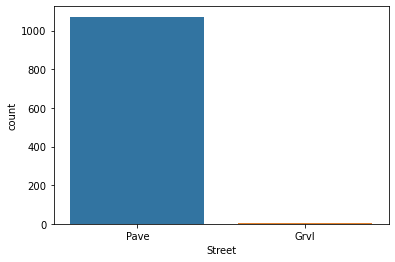

In [224]:
sns.countplot(df['Street'])

<AxesSubplot:xlabel='Alley', ylabel='count'>

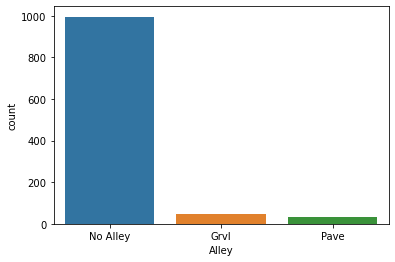

In [225]:
df['Alley'].fillna('No Alley', inplace=True)
sns.countplot(df['Alley'])

Text(0.5, 1.0, 'LotConfig')

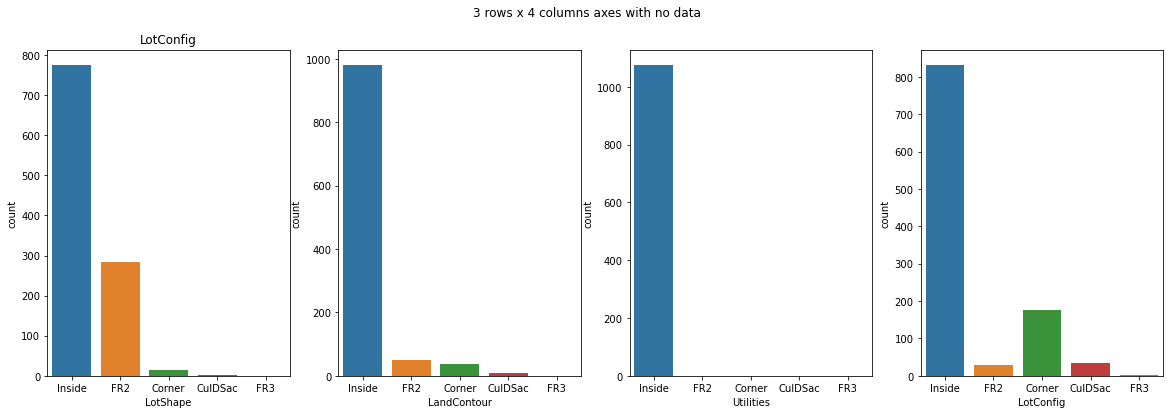

In [226]:
fig, axes = plt.subplots(1, 4, sharex=True, figsize=(20,6))
fig.suptitle('3 rows x 4 columns axes with no data')


sns.countplot(df.LotShape, x='LotShape', ax=axes[0])
axes[0].set_title('LotShape')

sns.countplot(df.LandContour, x='LandContour', ax=axes[1])
axes[0].set_title('LandContour')

sns.countplot(df.Utilities, x='Utilities', ax=axes[2])
axes[0].set_title('Utilities')

sns.countplot(df.LotConfig, x='LotConfig', ax=axes[3])
axes[0].set_title('LotConfig')

Text(0.5, 1.0, 'Condition2')

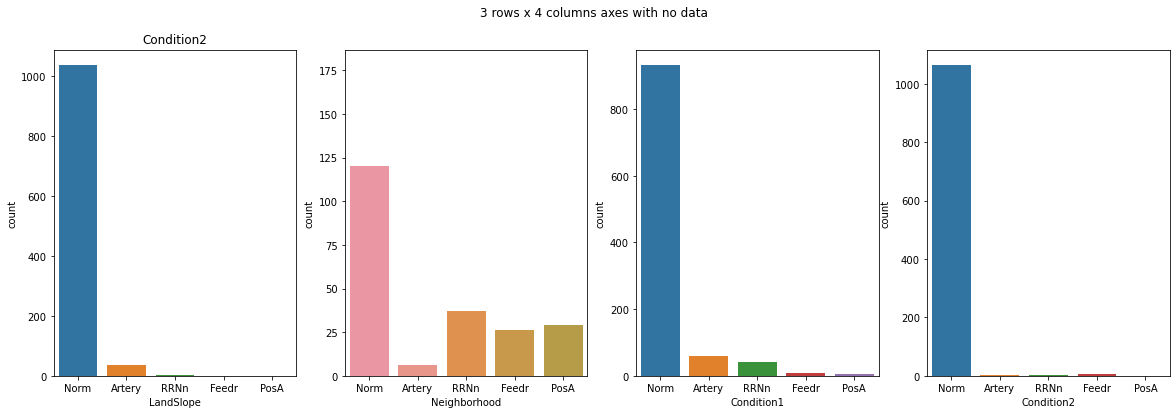

In [227]:
fig, axes = plt.subplots(1, 4, sharex=True, figsize=(20,6))
fig.suptitle('3 rows x 4 columns axes with no data')


sns.countplot(df.LandSlope, x='LandSlope', ax=axes[0])
axes[0].set_title('LandSlope')

sns.countplot(df.Neighborhood, x='Neighborhood', ax=axes[1])
axes[0].set_title('Neighborhood')

sns.countplot(df.Condition1, x='Condition1', ax=axes[2])
axes[0].set_title('Condition1')

sns.countplot(df.Condition2, x='Condition2', ax=axes[3])
axes[0].set_title('Condition2')

Text(0.5, 1.0, 'HouseStyle')

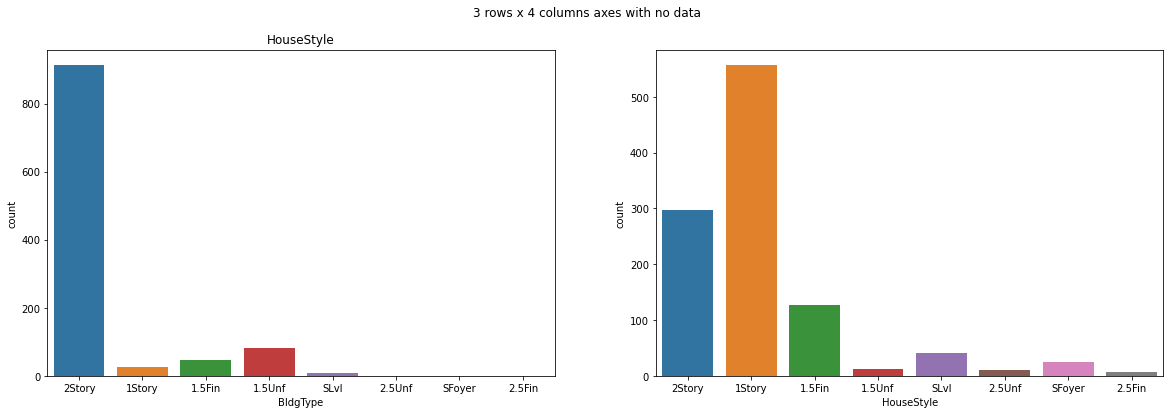

In [228]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,6))
fig.suptitle('3 rows x 4 columns axes with no data')


sns.countplot(df.BldgType, x='BldgType', ax=axes[0])
axes[0].set_title('BldgType')

sns.countplot(df.HouseStyle, x='HouseStyle', ax=axes[1])
axes[0].set_title('HouseStyle')

<AxesSubplot:xlabel='OverallQual', ylabel='count'>

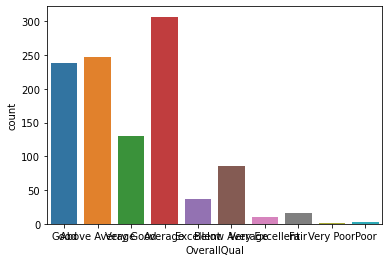

In [229]:
df['OverallQual'] = df['OverallQual'].map({10:'Very Excellent', 
                                           9:'Excellent', 
                                           8:'Very Good', 
                                           7:'Good', 
                                           6:'Above Average',
                                           5:'Average',
                                           4:'Below Average',
                                           3:'Fair',
                                           2:'Poor',
                                           1:'Very Poor'
                                          })
sns.countplot(df['OverallQual'])

<AxesSubplot:xlabel='OverallCond', ylabel='count'>

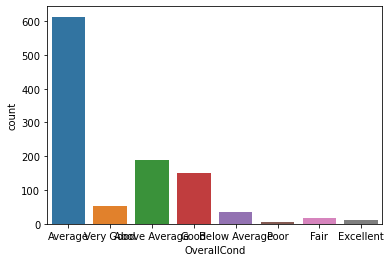

In [230]:
df['OverallCond'] = df['OverallCond'].map({10:'Very Excellent', 
                                           9:'Excellent', 
                                           8:'Very Good', 
                                           7:'Good', 
                                           6:'Above Average',
                                           5:'Average',
                                           4:'Below Average',
                                           3:'Fair',
                                           2:'Poor',
                                           1:'Very Poor'
                                          })
sns.countplot(df['OverallCond'])

<AxesSubplot:xlabel='RoofStyle', ylabel='count'>

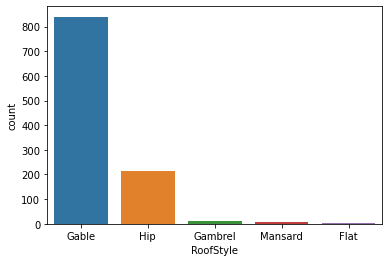

In [231]:
sns.countplot(df.RoofStyle, x='RoofStyle')

<AxesSubplot:xlabel='RoofMatl', ylabel='count'>

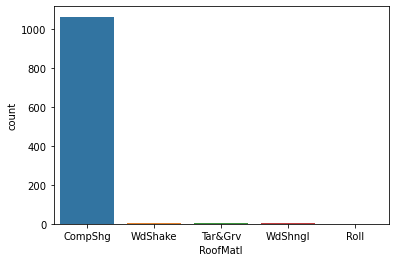

In [232]:
sns.countplot(df.RoofMatl, x='RoofMatl')

<AxesSubplot:xlabel='Exterior1st', ylabel='count'>

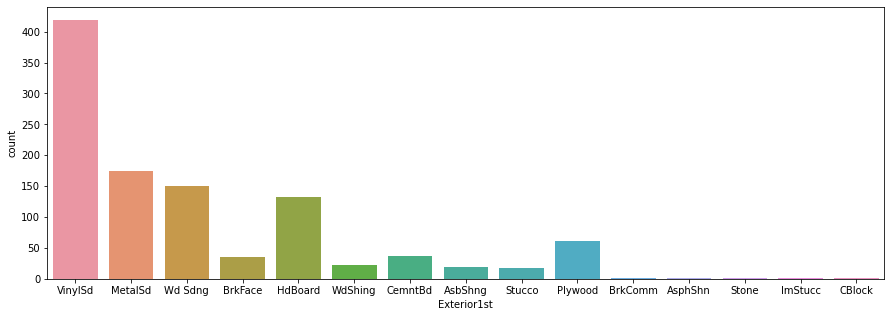

In [233]:
plt.figure(figsize=(15,5))
sns.countplot(df.Exterior1st, x='Exterior1st')

<AxesSubplot:xlabel='Exterior2nd', ylabel='count'>

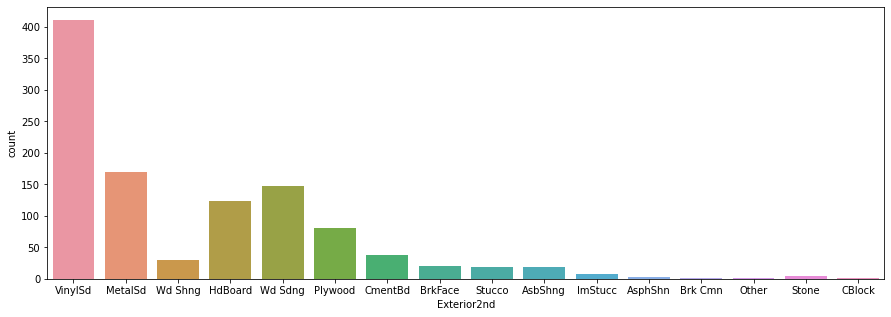

In [234]:
plt.figure(figsize=(15,5))
sns.countplot(df.Exterior2nd, x='Exterior2nd')

<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

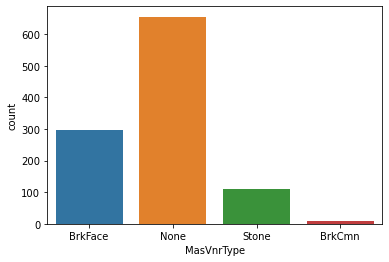

In [235]:
df = df[df['MasVnrType'].notna()]
sns.countplot(df['MasVnrType'])

<AxesSubplot:xlabel='MasVnrArea'>

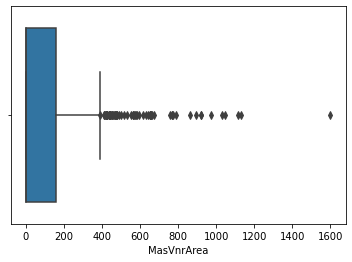

In [236]:
sns.boxplot(df['MasVnrArea'])

In [237]:
iqr = df['MasVnrArea'].quantile(0.75) - df['MasVnrArea'].quantile(0.25)
lq = df['MasVnrArea'].quantile(0.25) - 1.5*iqr
uq = df['MasVnrArea'].quantile(0.75) + 1.5*iqr
df = df[(df['MasVnrArea'] >= lq) & (df['MasVnrArea'] <= uq)]

Text(0.5, 1.0, 'Foundation')

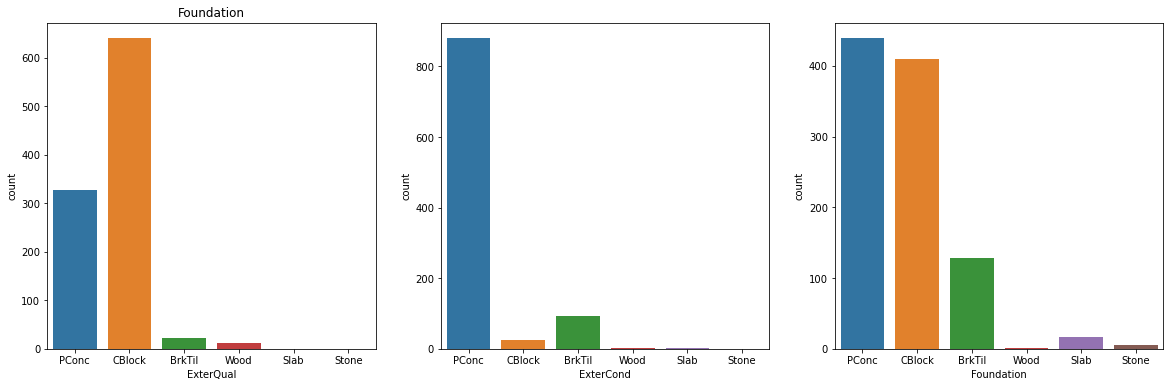

In [238]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(20,6))

sns.countplot(df.ExterQual, x='ExterQual', ax=axes[0])
axes[0].set_title('ExterQual')

sns.countplot(df.ExterCond, x='ExterCond', ax=axes[1])
axes[0].set_title('ExterCond')

sns.countplot(df.Foundation, x='Foundation', ax=axes[2])
axes[0].set_title('Foundation')

<AxesSubplot:xlabel='BsmtQual', ylabel='count'>

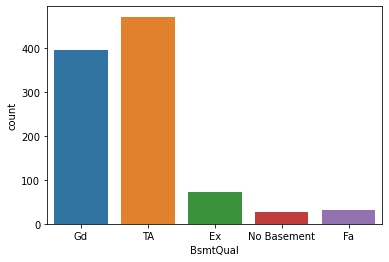

In [239]:
df['BsmtQual'].fillna('No Basement', inplace=True)
sns.countplot(df['BsmtQual'])

<AxesSubplot:xlabel='BsmtCond', ylabel='count'>

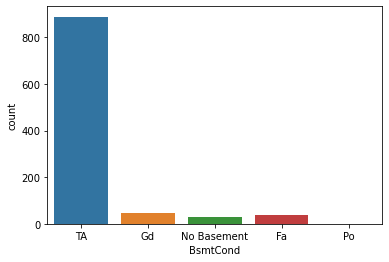

In [240]:
df['BsmtCond'].fillna('No Basement', inplace=True)
sns.countplot(df['BsmtCond'])

<AxesSubplot:xlabel='BsmtExposure', ylabel='count'>

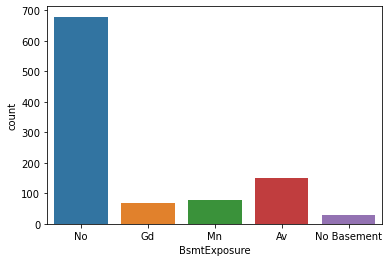

In [241]:
df['BsmtExposure'].fillna('No Basement', inplace=True)
sns.countplot(df['BsmtExposure'])

<AxesSubplot:xlabel='BsmtFinType1', ylabel='count'>

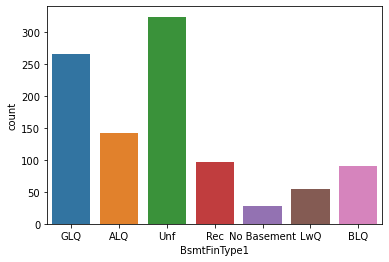

In [242]:
df['BsmtFinType1'].fillna('No Basement', inplace=True)
sns.countplot(df['BsmtFinType1'])

<AxesSubplot:xlabel='BsmtFinType2', ylabel='count'>

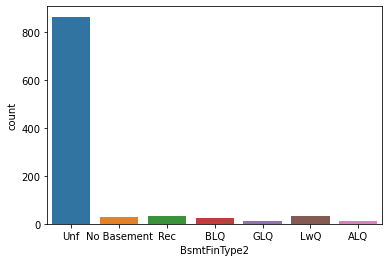

In [243]:
df['BsmtFinType2'].fillna('No Basement', inplace=True)
sns.countplot(df['BsmtFinType2'])

<AxesSubplot:xlabel='BsmtFinSF1'>

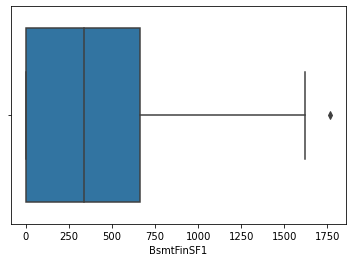

In [244]:
sns.boxplot(df.BsmtFinSF1)

<AxesSubplot:xlabel='BsmtFinSF2'>

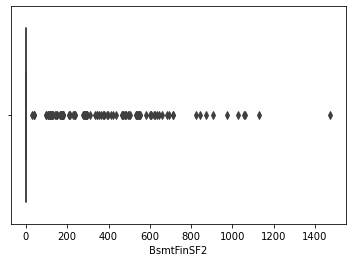

In [245]:
sns.boxplot(df.BsmtFinSF2)

In [246]:
# Removing outliers will make the all values 0. So lets drop this column.
df.drop(columns=['BsmtFinSF2'], inplace=True)

<AxesSubplot:xlabel='BsmtUnfSF'>

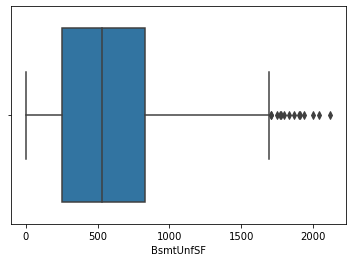

In [247]:
sns.boxplot(df['BsmtUnfSF'])

<AxesSubplot:xlabel='TotalBsmtSF'>

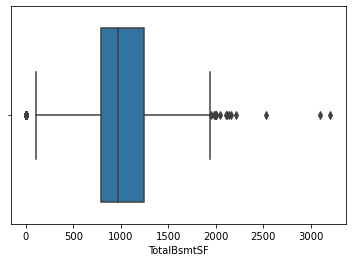

In [248]:
sns.boxplot(df['TotalBsmtSF'])

In [249]:
iqr = df['TotalBsmtSF'].quantile(0.75) - df['TotalBsmtSF'].quantile(0.25)
lq = df['TotalBsmtSF'].quantile(0.25) - 1.5*iqr
uq = df['TotalBsmtSF'].quantile(0.75) + 1.5*iqr
df = df[(df['TotalBsmtSF'] >= lq) & (df['TotalBsmtSF'] <= uq)]

Text(0.5, 1.0, 'CentralAir')

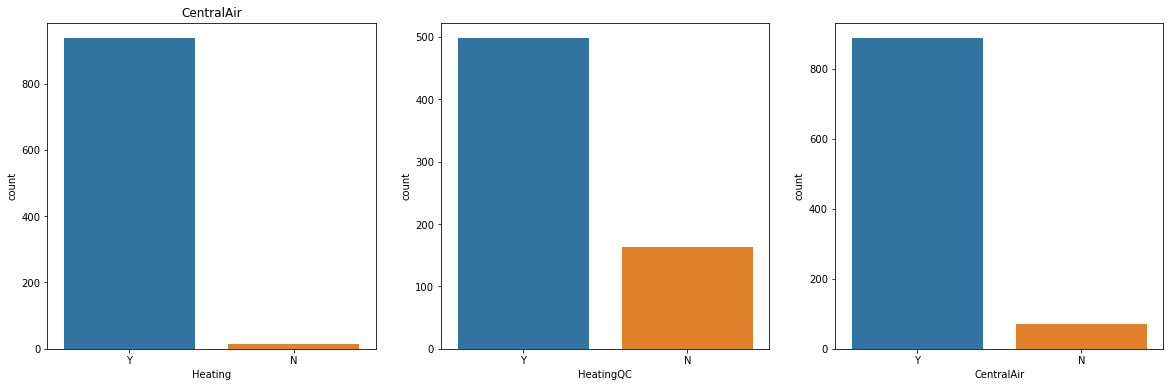

In [250]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(20,6))

sns.countplot(df.Heating, x='Heating', ax=axes[0])
axes[0].set_title('Heating')

sns.countplot(df.HeatingQC, x='HeatingQC', ax=axes[1])
axes[0].set_title('HeatingQC')

sns.countplot(df.CentralAir, x='CentralAir', ax=axes[2])
axes[0].set_title('CentralAir')

<AxesSubplot:xlabel='Electrical', ylabel='count'>

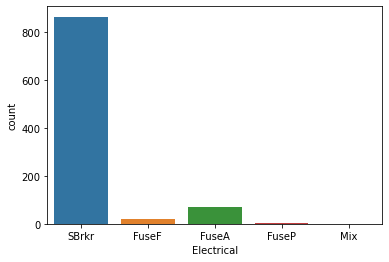

In [251]:
df = df[df['Electrical'].notna()]
sns.countplot(df['Electrical'])

<AxesSubplot:xlabel='1stFlrSF'>

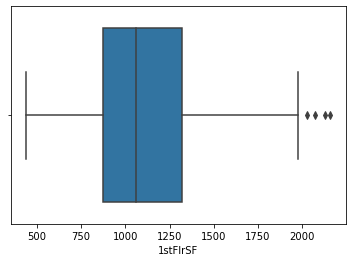

In [252]:
sns.boxplot(df['1stFlrSF'])

<AxesSubplot:xlabel='2ndFlrSF'>

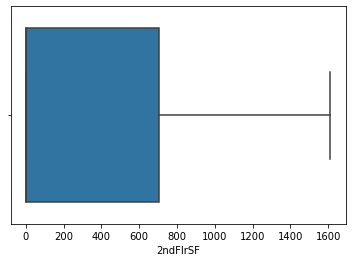

In [253]:
sns.boxplot(df['2ndFlrSF'])

<AxesSubplot:xlabel='LowQualFinSF'>

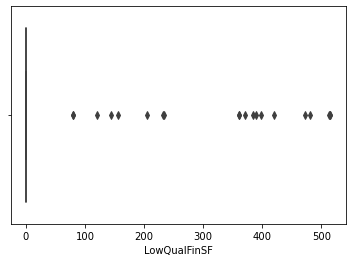

In [254]:
sns.boxplot(df['LowQualFinSF'])

In [255]:
#Lets drop this column
df.drop(columns=['LowQualFinSF'], inplace=True)

<AxesSubplot:xlabel='GrLivArea'>

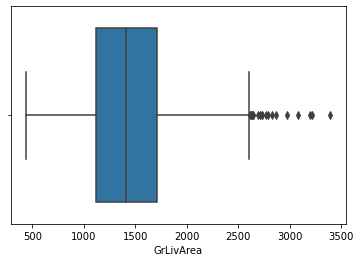

In [256]:
sns.boxplot(df['GrLivArea'])

In [257]:
iqr = df['GrLivArea'].quantile(0.75) - df['GrLivArea'].quantile(0.25)
lq = df['GrLivArea'].quantile(0.25) - 1.5*iqr
uq = df['GrLivArea'].quantile(0.75) + 1.5*iqr
df = df[(df['GrLivArea'] >= lq) & (df['GrLivArea'] <= uq)]

<AxesSubplot:xlabel='BsmtFullBath', ylabel='count'>

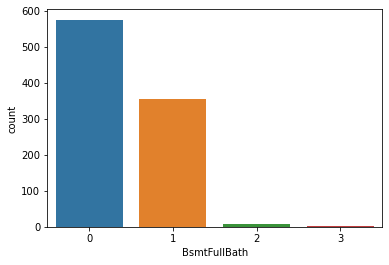

In [258]:
sns.countplot(df['BsmtFullBath'])

<AxesSubplot:xlabel='BsmtHalfBath', ylabel='count'>

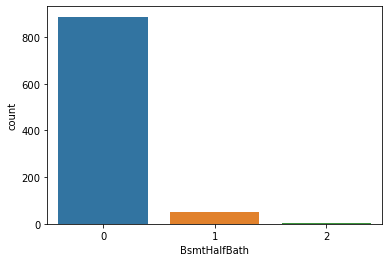

In [259]:
sns.countplot(df['BsmtHalfBath'])

<AxesSubplot:xlabel='FullBath', ylabel='count'>

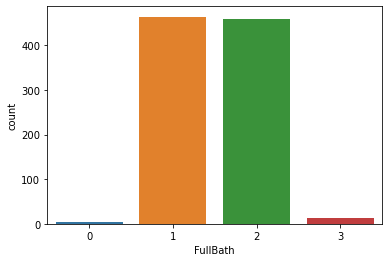

In [260]:
sns.countplot(df['FullBath'])

<AxesSubplot:xlabel='HalfBath', ylabel='count'>

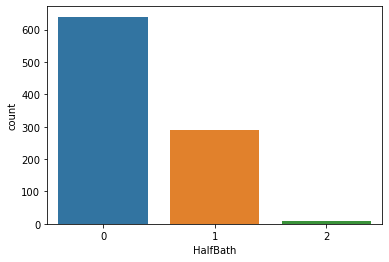

In [261]:
sns.countplot(df['HalfBath'])

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='count'>

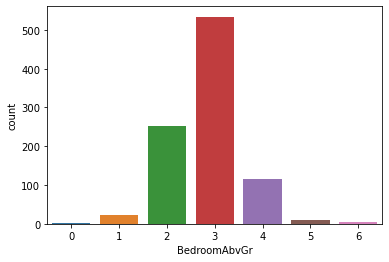

In [262]:
sns.countplot(df['BedroomAbvGr'])

<AxesSubplot:xlabel='KitchenAbvGr', ylabel='count'>

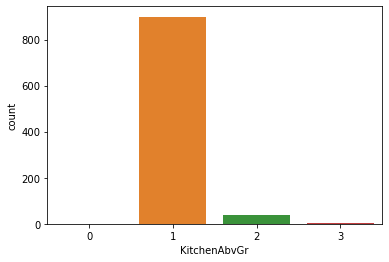

In [263]:
sns.countplot(df['KitchenAbvGr'])

<AxesSubplot:xlabel='KitchenQual', ylabel='count'>

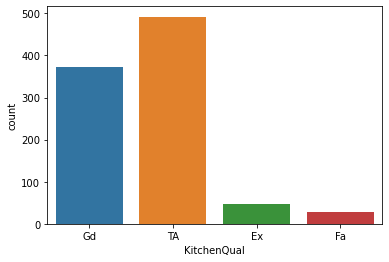

In [264]:
sns.countplot(df['KitchenQual'])

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='count'>

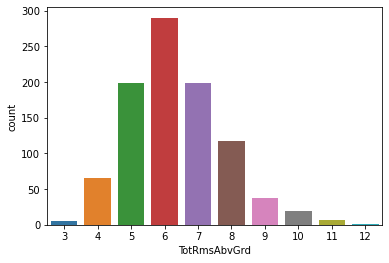

In [265]:
sns.countplot(df['TotRmsAbvGrd'])

<AxesSubplot:xlabel='Functional', ylabel='count'>

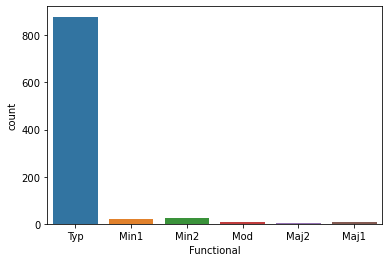

In [266]:
sns.countplot(df['Functional'])

<AxesSubplot:xlabel='Fireplaces', ylabel='count'>

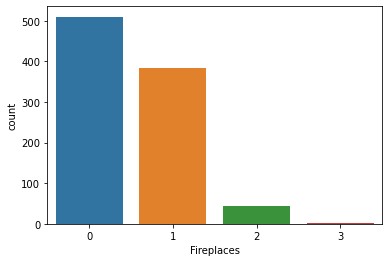

In [267]:
sns.countplot(df['Fireplaces'])

<AxesSubplot:xlabel='FireplaceQu', ylabel='count'>

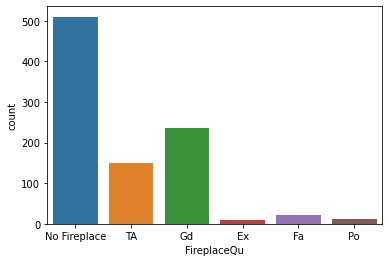

In [268]:
df['FireplaceQu'].fillna('No Fireplace', inplace=True)
sns.countplot(df['FireplaceQu'])

<AxesSubplot:xlabel='GarageType', ylabel='count'>

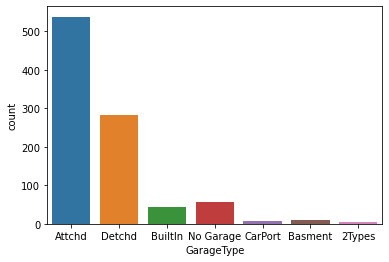

In [269]:
df['GarageType'].fillna('No Garage', inplace=True)
sns.countplot(df['GarageType'])

<AxesSubplot:xlabel='count', ylabel='GarageYrBlt'>

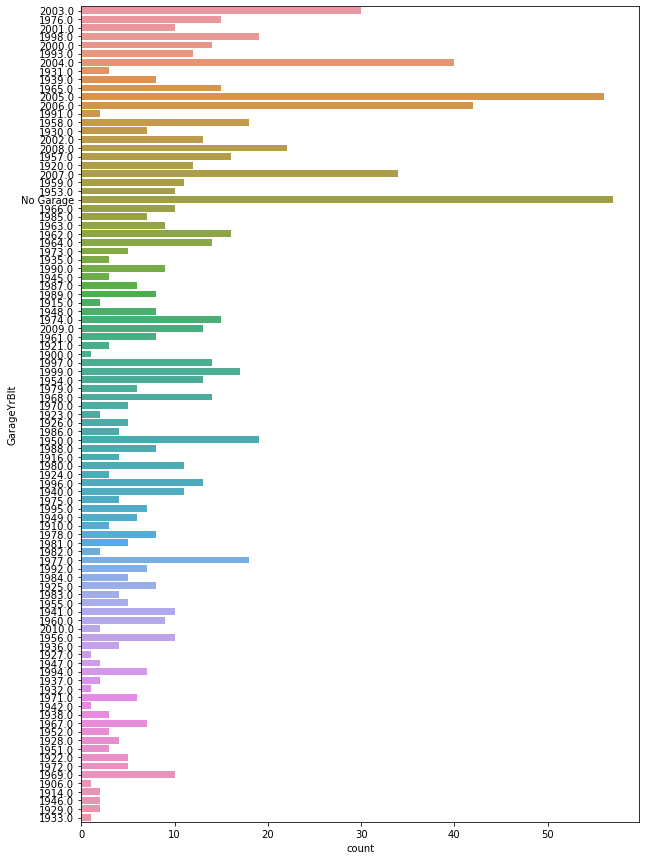

In [270]:
df['GarageYrBlt'].fillna('No Garage', inplace=True)
plt.figure(figsize=(10,15))
sns.countplot(y=df['GarageYrBlt'])

<AxesSubplot:xlabel='GarageFinish', ylabel='count'>

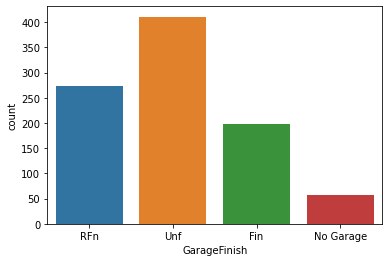

In [271]:
df['GarageFinish'].fillna('No Garage', inplace=True)
sns.countplot(df['GarageFinish'])

In [272]:
#  70  ScreenPorch    1460 non-null   int64  
#  71  PoolArea       1460 non-null   int64  
#  72  PoolQC         7 non-null      object 
#  73  Fence          281 non-null    object 
#  74  MiscFeature    54 non-null     object 
#  75  MiscVal        1460 non-null   int64  
#  76  MoSold         1460 non-null   int64  
#  77  YrSold         1460 non-null   int64  
#  78  SaleType       1460 non-null   object 
#  79  SaleCondition  1460 non-null   object 
#  80  SalePrice      1460 non-null   int64

<AxesSubplot:xlabel='GarageCars', ylabel='count'>

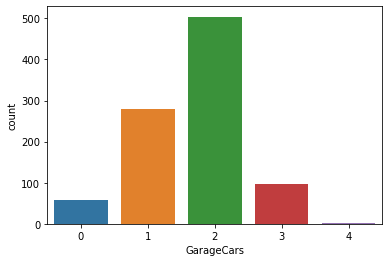

In [273]:
sns.countplot(df['GarageCars'])

<AxesSubplot:xlabel='GarageArea'>

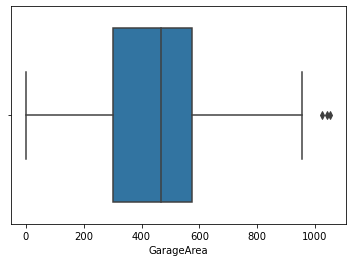

In [274]:
sns.boxplot(df['GarageArea'])

<AxesSubplot:xlabel='GarageQual', ylabel='count'>

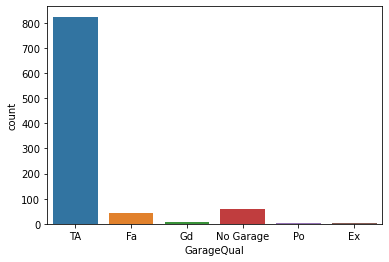

In [275]:
df['GarageQual'].fillna('No Garage', inplace=True)
sns.countplot(df['GarageQual'])

<AxesSubplot:xlabel='GarageCond', ylabel='count'>

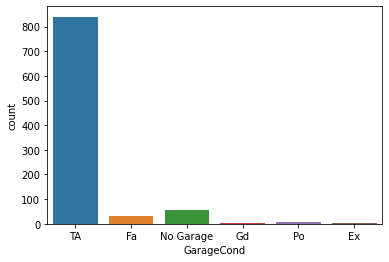

In [276]:
df['GarageCond'].fillna('No Garage', inplace=True)
sns.countplot(df['GarageCond'])

<AxesSubplot:xlabel='PavedDrive', ylabel='count'>

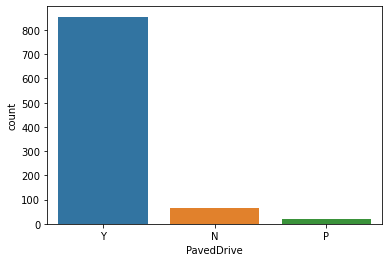

In [277]:
sns.countplot(df['PavedDrive'])

<AxesSubplot:xlabel='WoodDeckSF'>

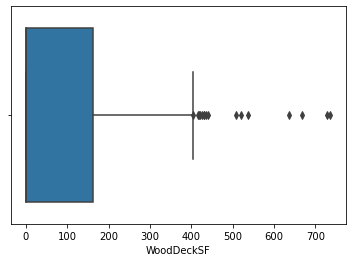

In [278]:
sns.boxplot(df['WoodDeckSF'])

In [279]:
iqr = df['WoodDeckSF'].quantile(0.75) - df['WoodDeckSF'].quantile(0.25)
lq = df['WoodDeckSF'].quantile(0.25) - 1.5*iqr
uq = df['WoodDeckSF'].quantile(0.75) + 1.5*iqr
df = df[(df['WoodDeckSF'] >= lq) & (df['WoodDeckSF'] <= uq)]

<AxesSubplot:xlabel='EnclosedPorch'>

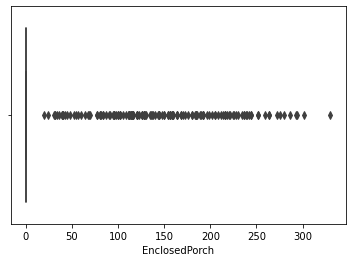

In [280]:
sns.boxplot(x='EnclosedPorch', data=df)

In [281]:
#Drop the column
# df.drop(columns=['EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea'], inplace=True)

<AxesSubplot:xlabel='PoolArea', ylabel='SalePrice'>

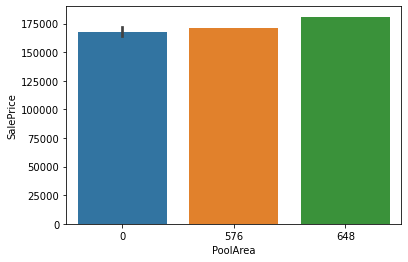

In [282]:
sns.barplot(data=df, x='PoolArea', y='SalePrice')

<AxesSubplot:xlabel='PoolQC', ylabel='count'>

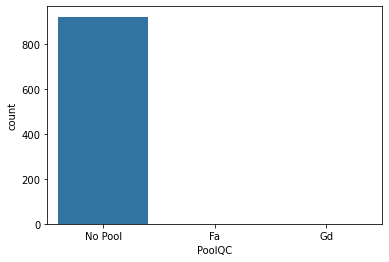

In [283]:
df['PoolQC'].fillna('No Pool', inplace=True)
sns.countplot(df['PoolQC'])

<AxesSubplot:xlabel='Fence', ylabel='count'>

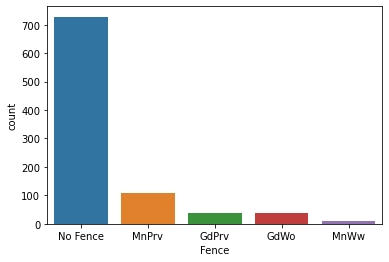

In [284]:
df['Fence'].fillna('No Fence', inplace=True)
sns.countplot(df['Fence'])

<AxesSubplot:xlabel='MiscFeature', ylabel='count'>

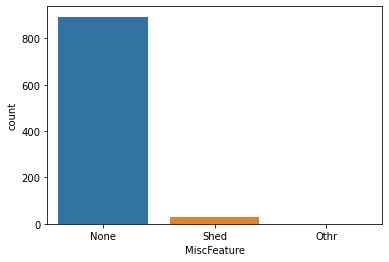

In [285]:
df['MiscFeature'].fillna('None', inplace=True)
sns.countplot(df['MiscFeature'])

<AxesSubplot:xlabel='MiscVal'>

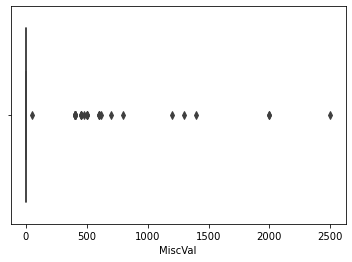

In [286]:
sns.boxplot(df['MiscVal'])

In [287]:
# df.drop(columns=['MiscVal'], inplace=True)

<AxesSubplot:xlabel='MiscVal', ylabel='SalePrice'>

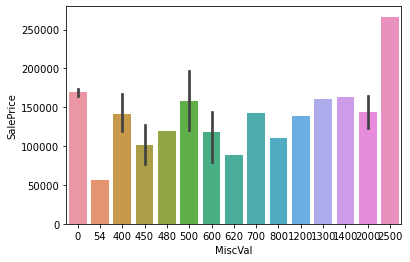

In [288]:
sns.barplot(x='MiscVal', y='SalePrice', data=df)

<AxesSubplot:xlabel='MoSold', ylabel='count'>

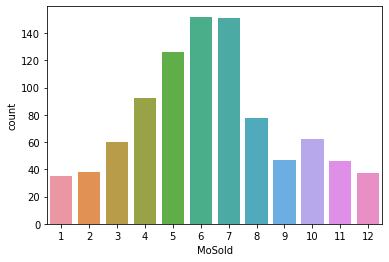

In [289]:
sns.countplot(df['MoSold'])

<AxesSubplot:xlabel='YrSold', ylabel='count'>

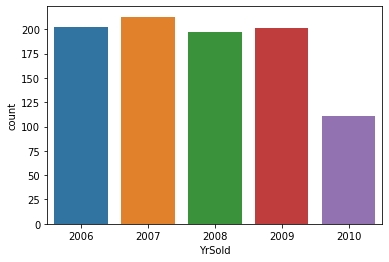

In [290]:
sns.countplot(df['YrSold'])

<AxesSubplot:xlabel='SaleType', ylabel='count'>

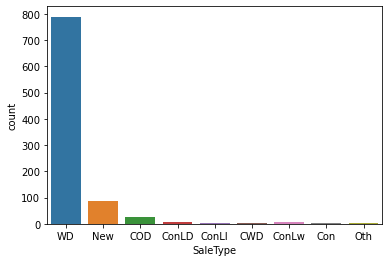

In [291]:
sns.countplot(df['SaleType'])

<AxesSubplot:xlabel='SaleCondition', ylabel='count'>

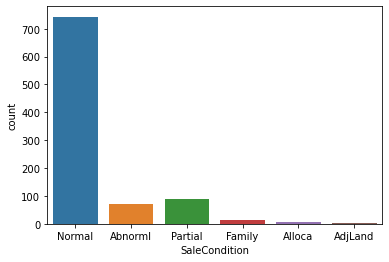

In [292]:
sns.countplot(df['SaleCondition'])

<AxesSubplot:xlabel='SalePrice'>

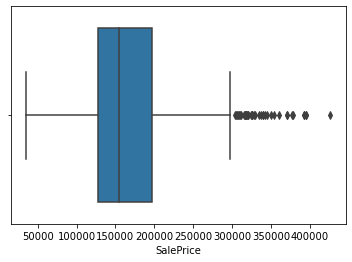

In [293]:
sns.boxplot(df['SalePrice'])

In [294]:
iqr = df['SalePrice'].quantile(0.75) - df['SalePrice'].quantile(0.25)
lq = df['SalePrice'].quantile(0.25) - 1.5*iqr
uq = df['SalePrice'].quantile(0.75) + 1.5*iqr
df = df[(df['SalePrice'] >= lq) & (df['SalePrice'] <= uq)]

In [295]:
df.shape

(884, 78)

In [296]:
#Bivariate Analysis
categorical_varible = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'YearBuilt', 'YearRemodAdd', 'OpenPorchSF']
numerical_varible = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'SalePrice']

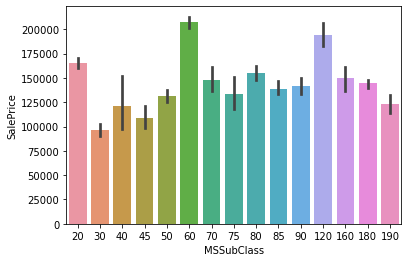

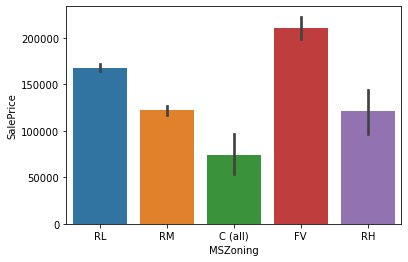

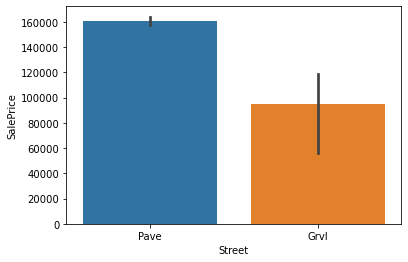

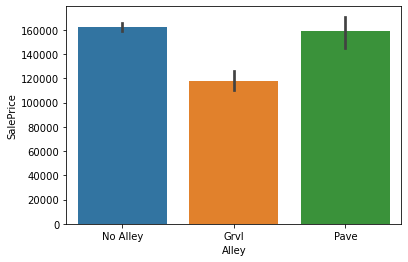

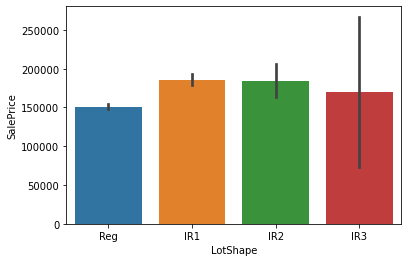

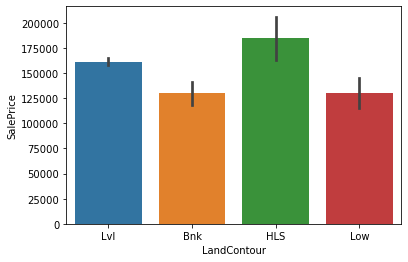

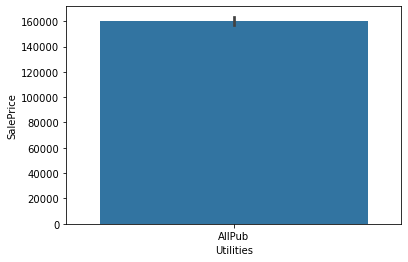

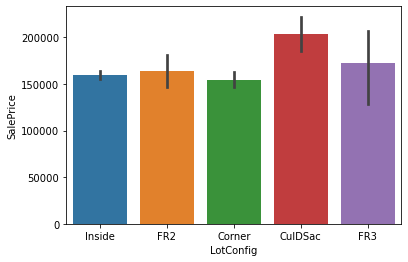

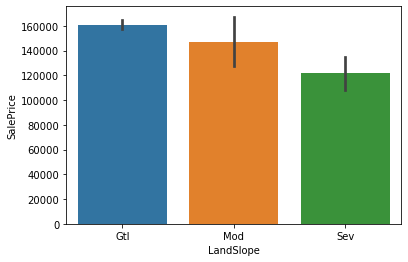

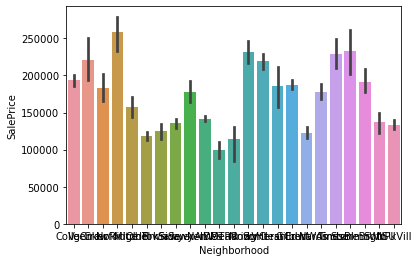

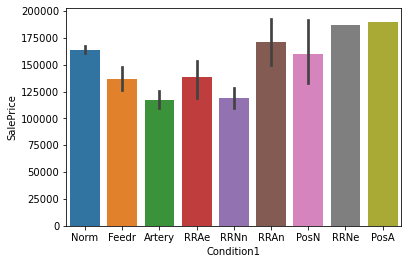

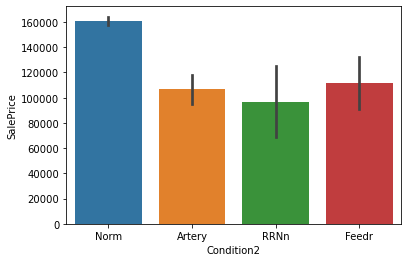

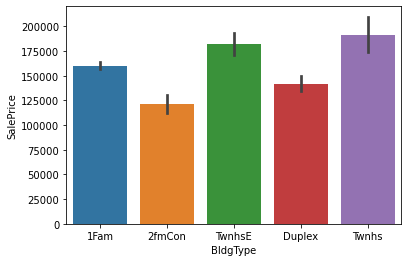

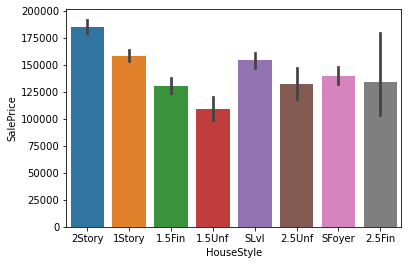

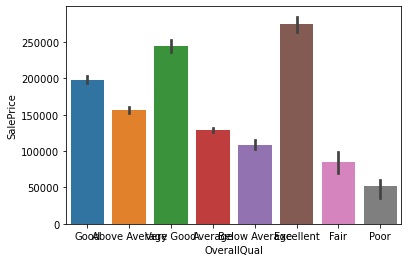

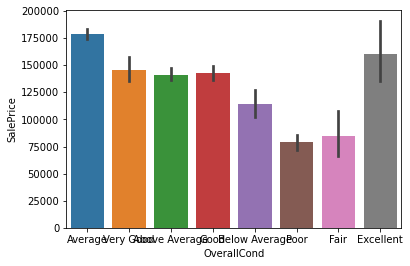

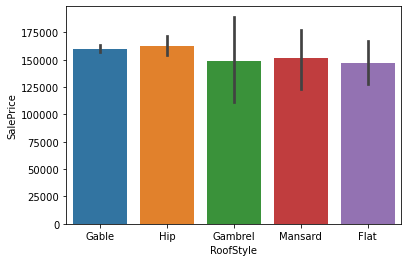

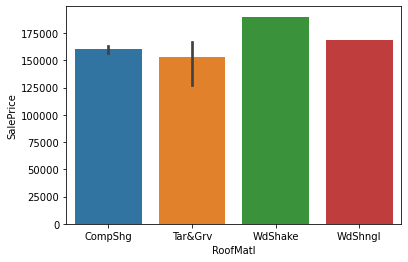

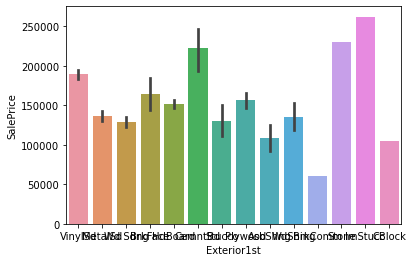

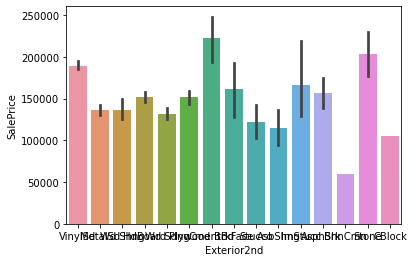

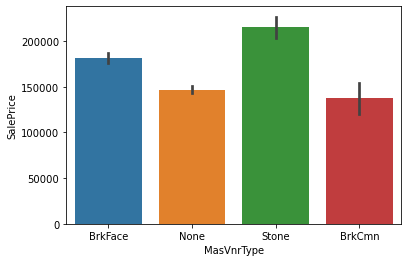

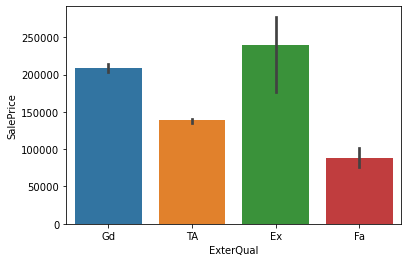

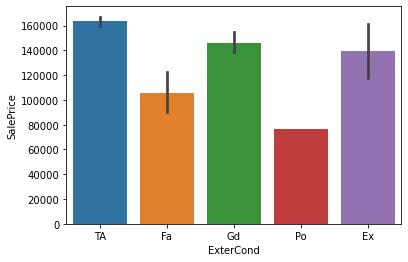

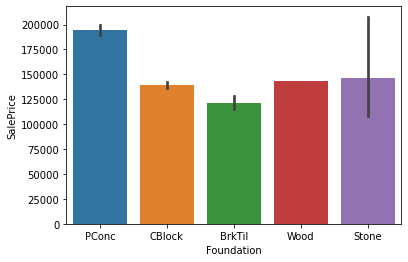

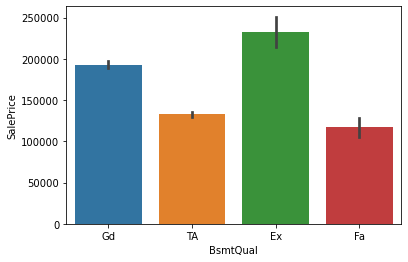

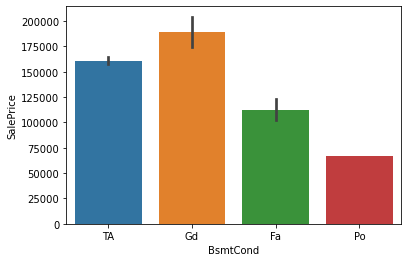

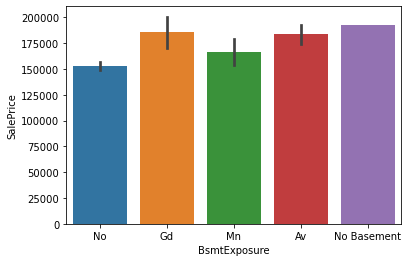

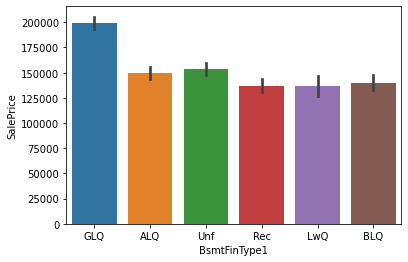

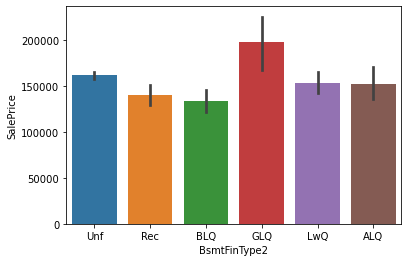

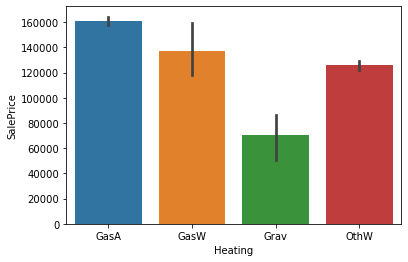

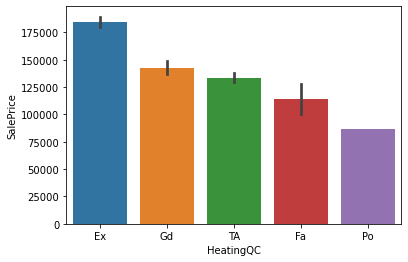

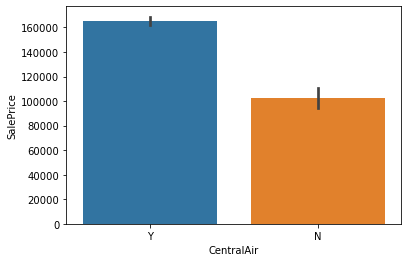

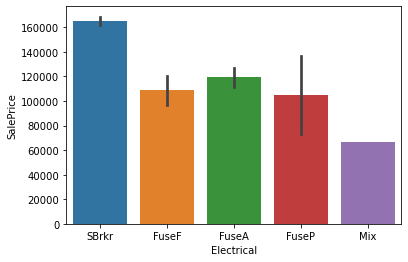

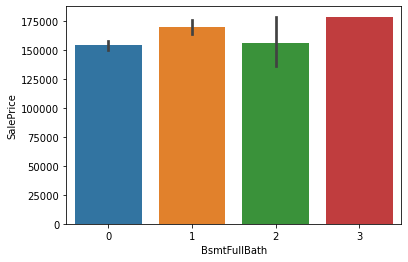

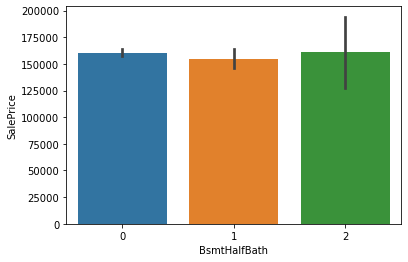

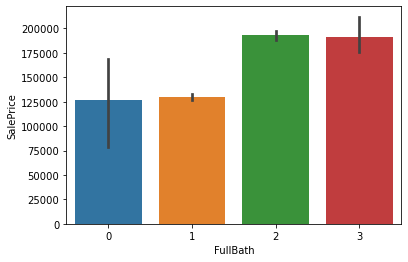

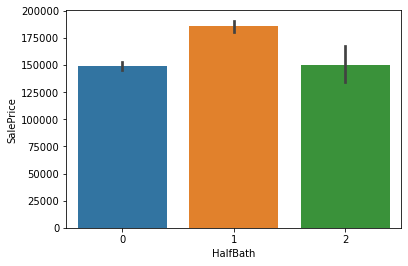

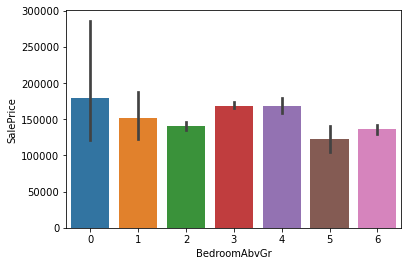

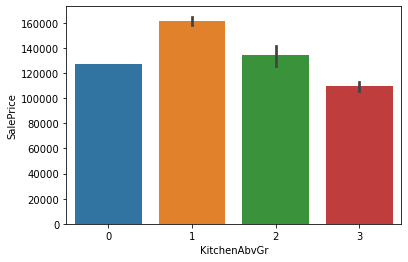

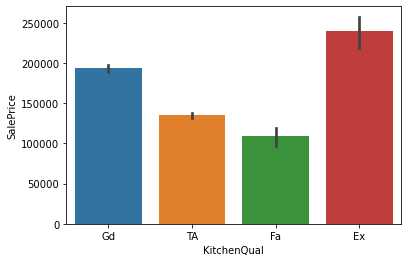

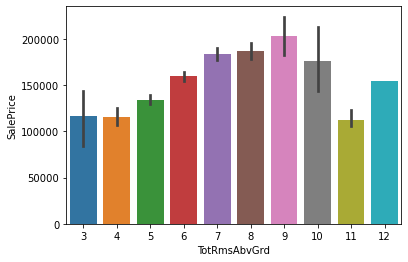

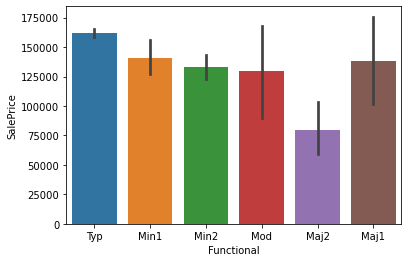

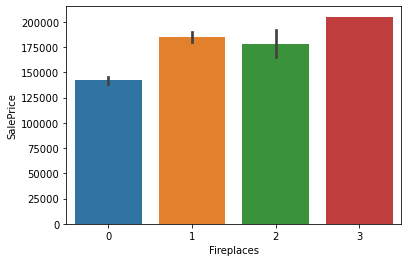

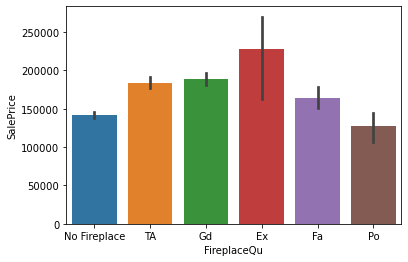

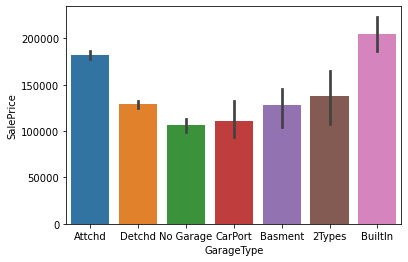

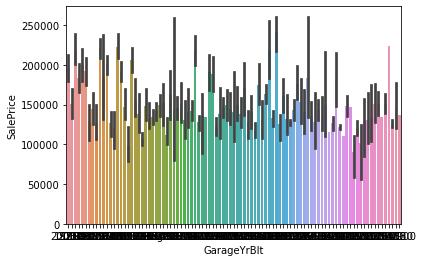

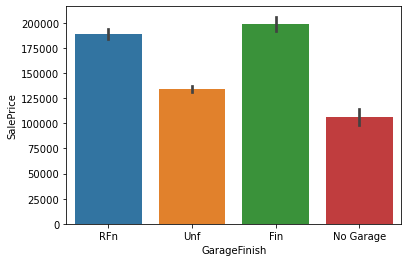

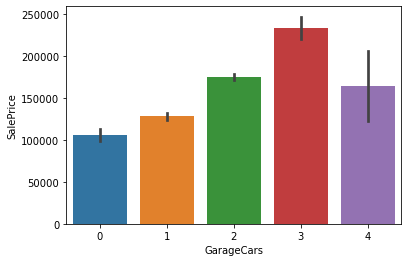

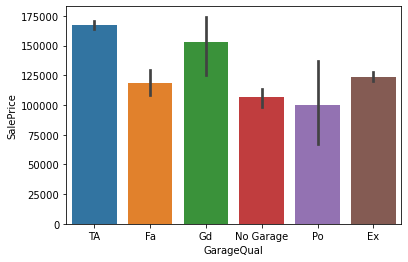

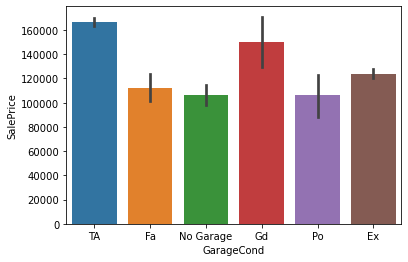

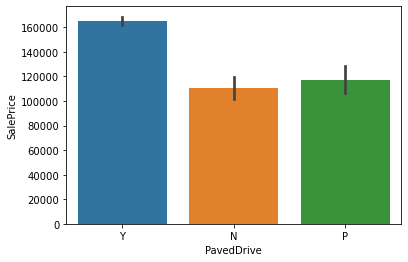

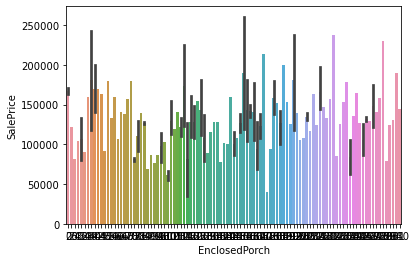

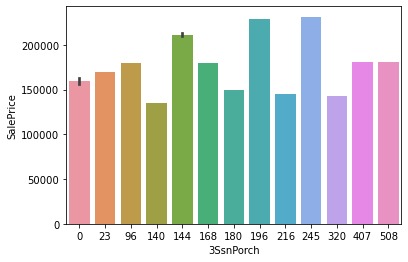

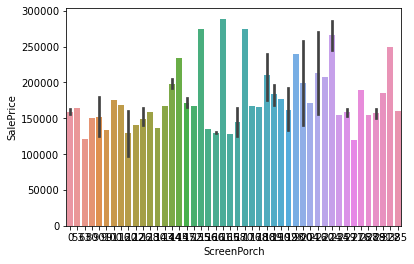

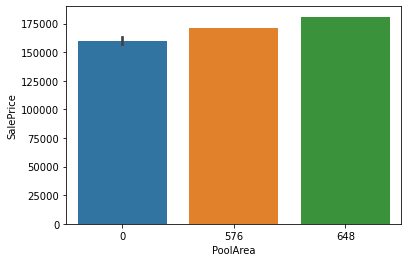

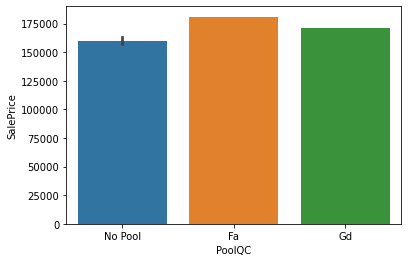

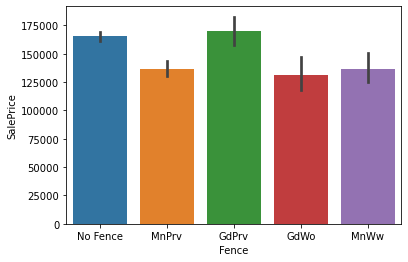

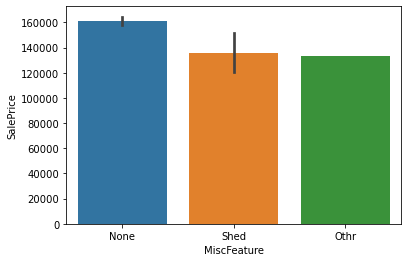

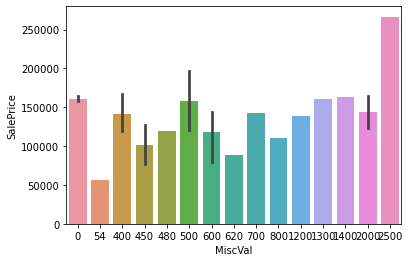

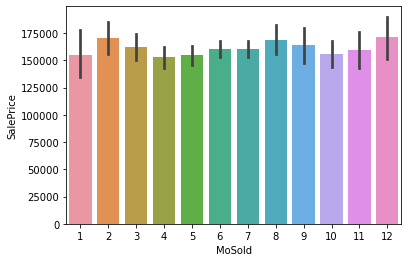

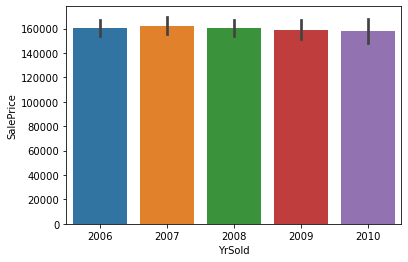

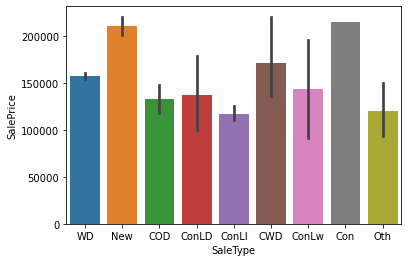

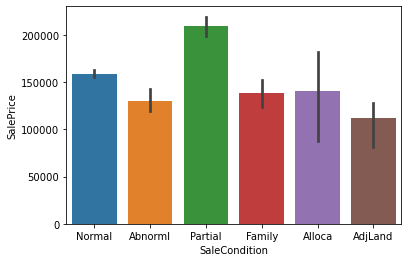

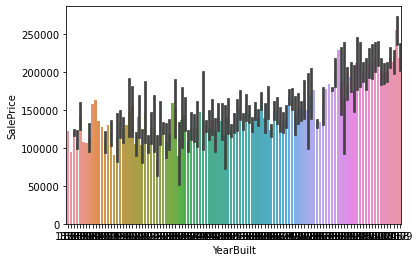

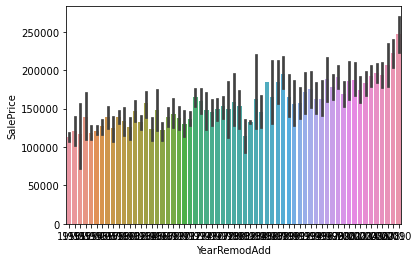

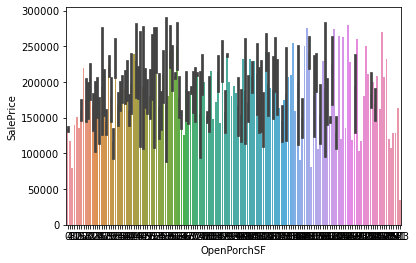

In [297]:
i = 1
for col in categorical_varible:
    plt.figure(i)
    sns.barplot(x=col, y='SalePrice', data=df)
    i += 1

<AxesSubplot:>

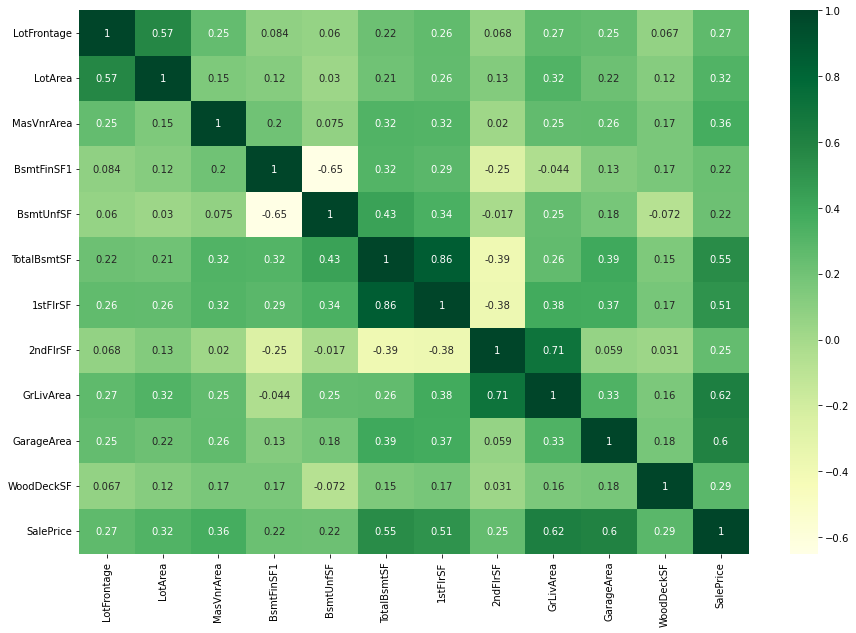

In [298]:
plt.figure(figsize=(15, 10))
sns.heatmap(df[numerical_varible].corr(), annot=True, cmap='YlGn')

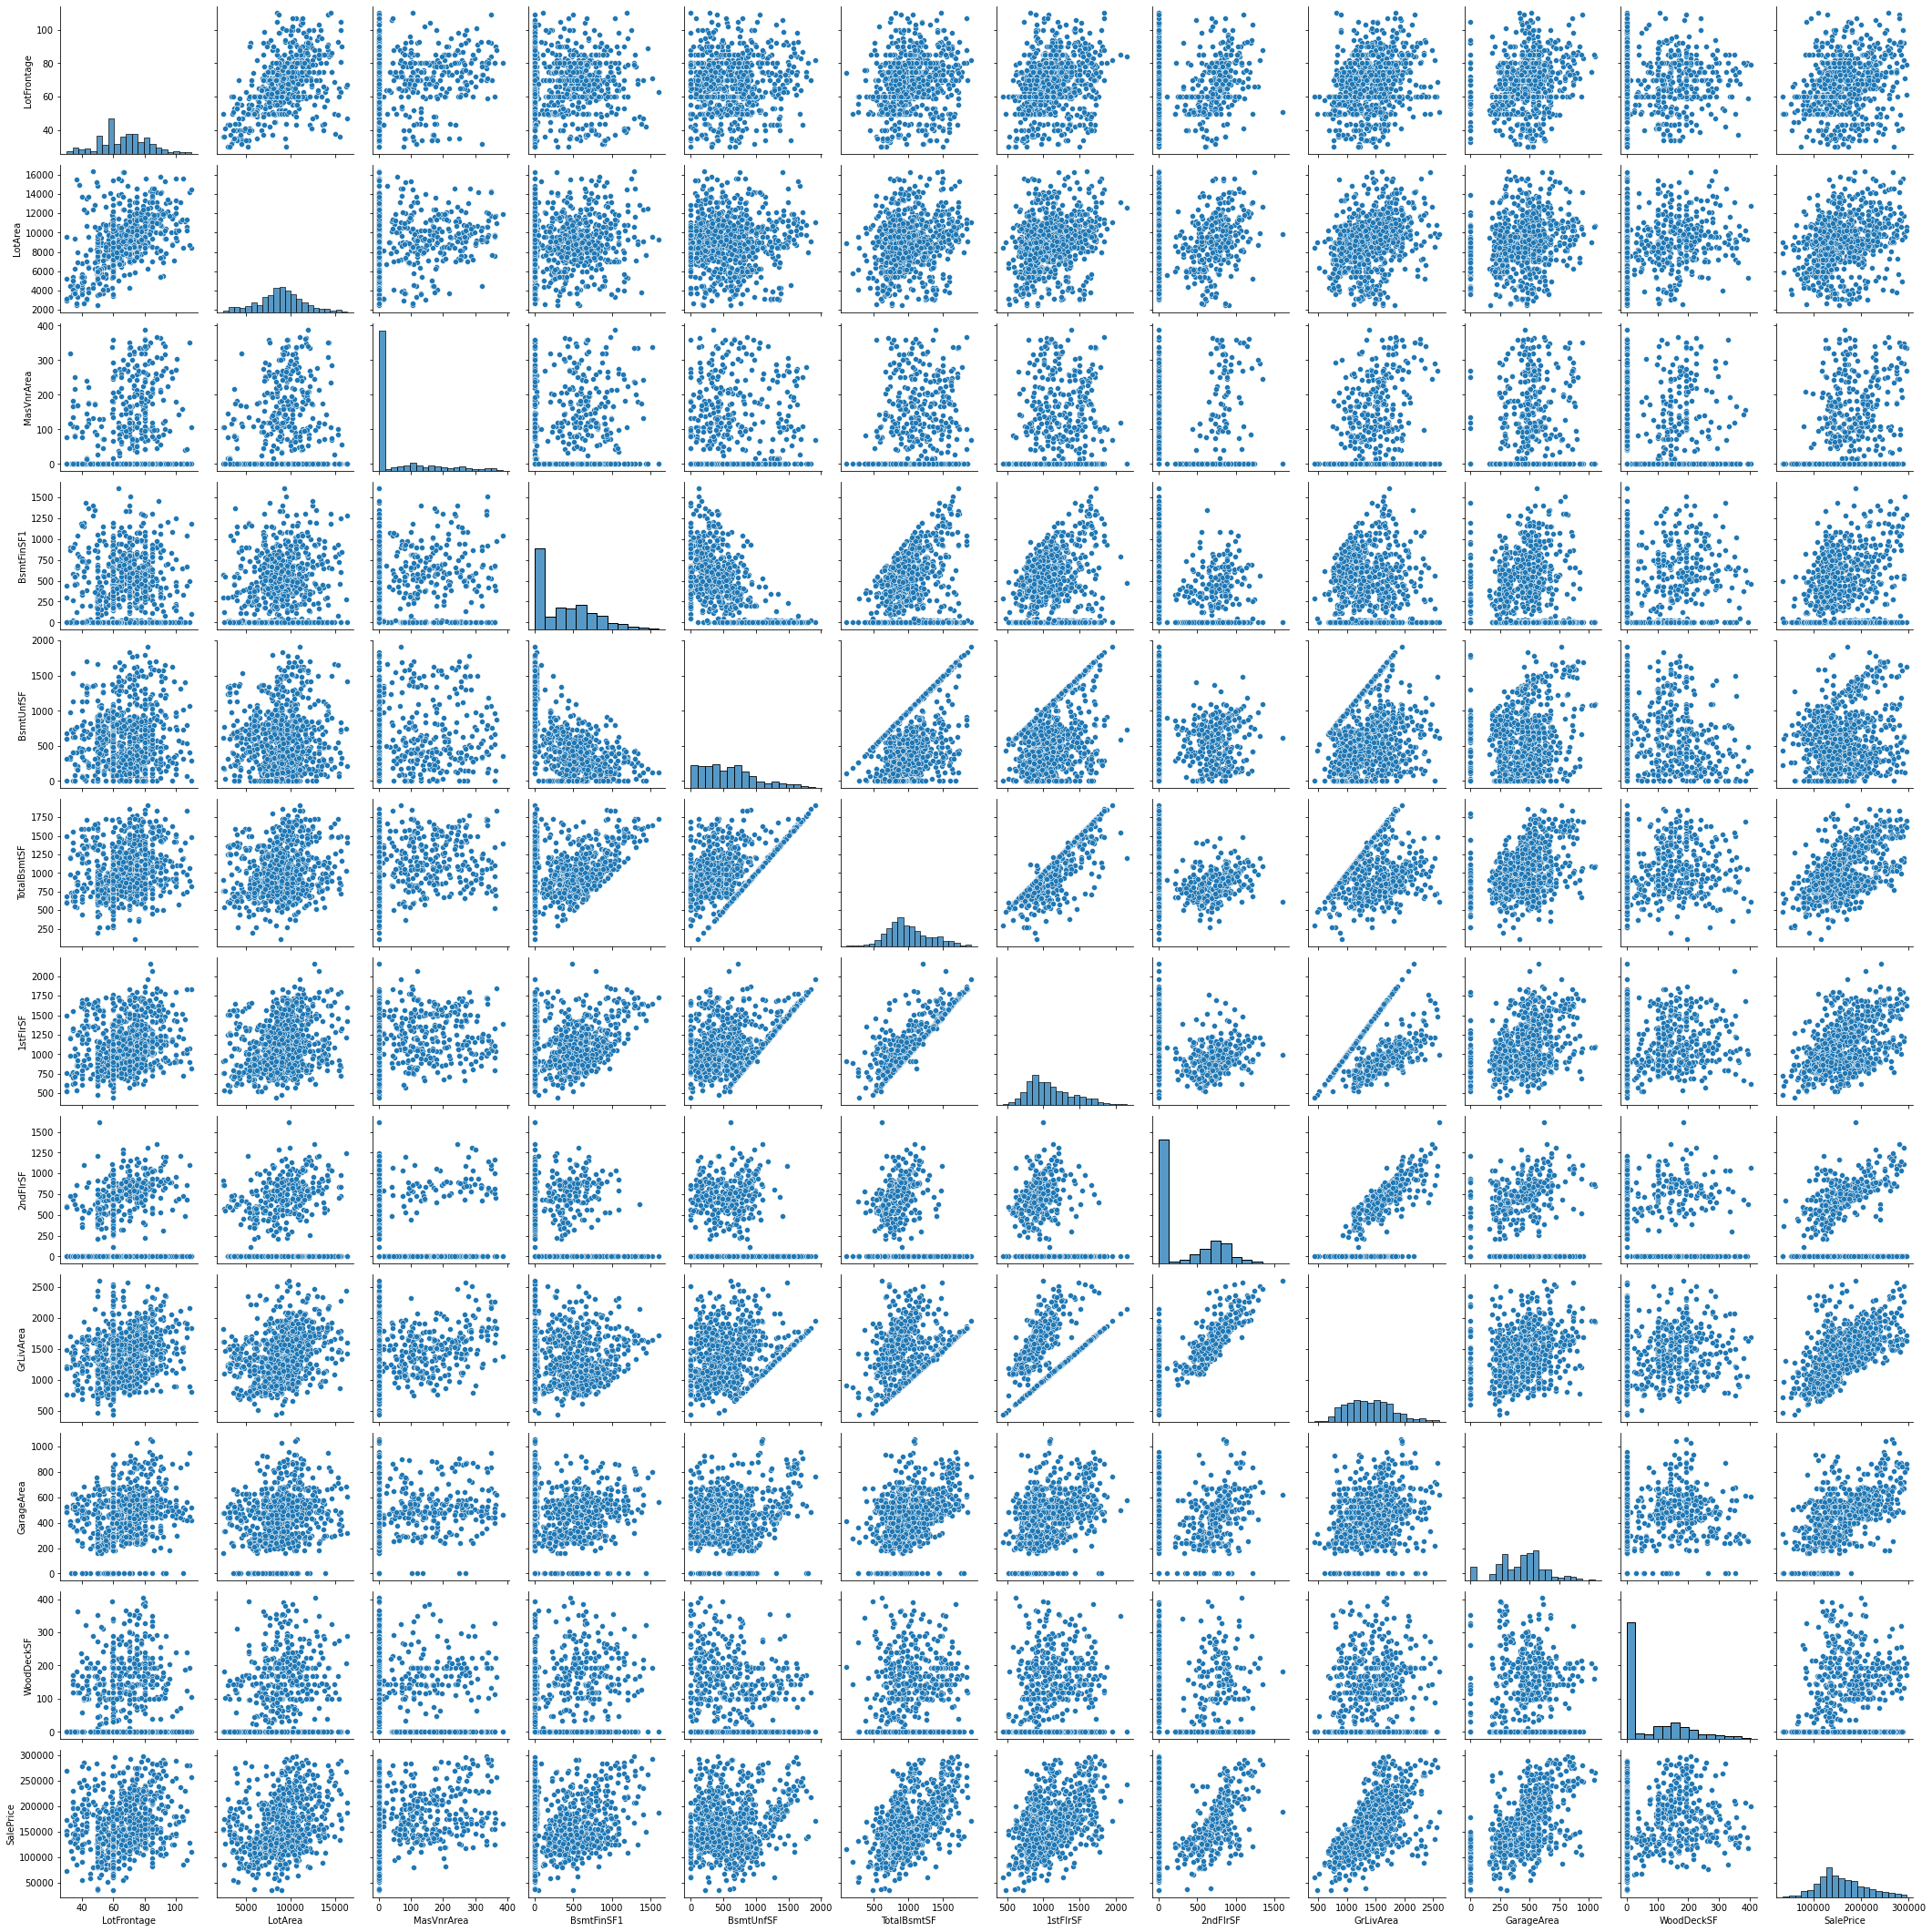

In [299]:
sns.pairplot(df[numerical_varible])

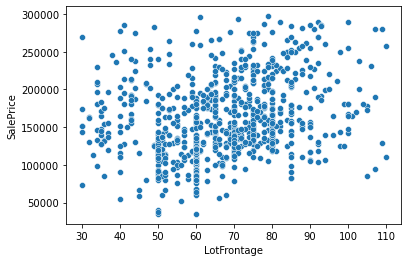

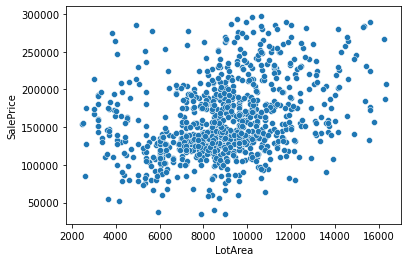

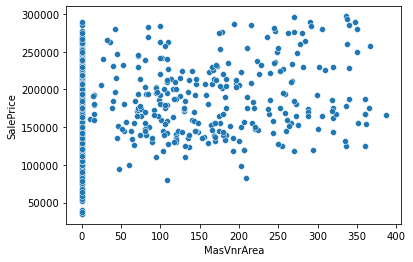

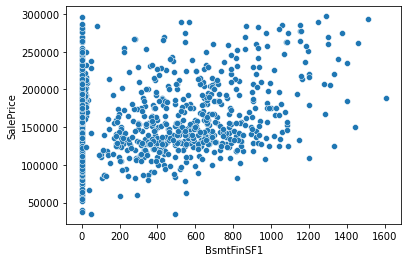

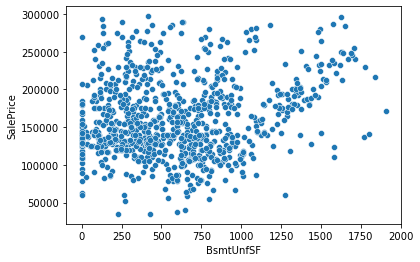

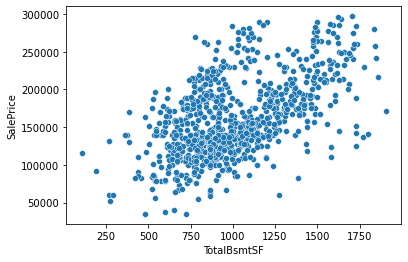

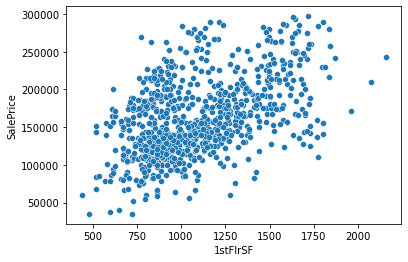

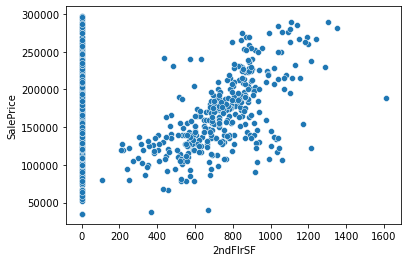

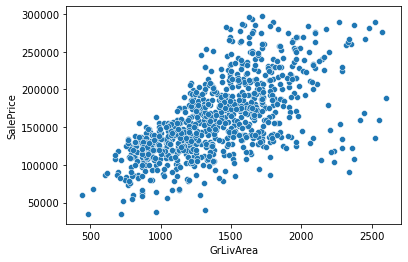

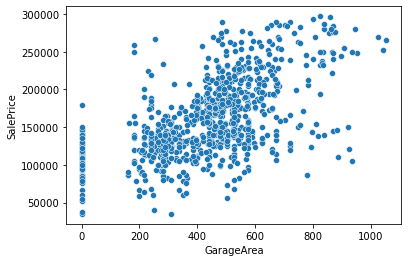

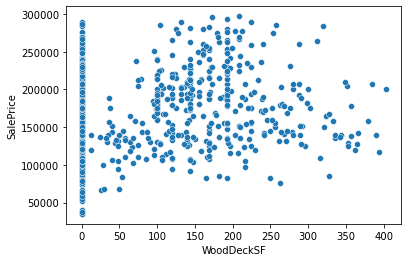

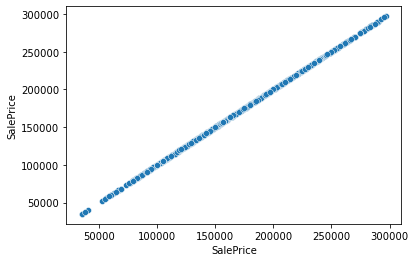

In [300]:
i = 1
for col in numerical_varible:
    plt.figure(i)
    sns.scatterplot(x=col, y='SalePrice', data=df)
    i += 1

In [301]:
# #Regression 
# #X_train, y_train
# y_train = df_train.pop('price')
# X_train = df_train

In [302]:
#Get Dummies
dummies = pd.get_dummies(df[categorical_varible], drop_first=True)
df = pd.concat([df, dummies], axis=1)
df.drop(columns=categorical_varible, inplace=True)
df.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0         65.0     8450       196.0         706        150          856   
1         80.0     9600         0.0         978        284         1262   
2         68.0    11250       162.0         486        434          920   
3         60.0     9550         0.0         216        540          756   
4         84.0    14260       350.0         655        490         1145   

   1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  ...  SaleType_ConLI  \
0       856       854       1710         548  ...               0   
1      1262         0       1262         460  ...               0   
2       920       866       1786         608  ...               0   
3       961       756       1717         642  ...               0   
4      1145      1053       2198         836  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 318 columns]

In [303]:
#Train Test Split
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(618, 318)
(266, 318)


In [304]:
# scaler = MinMaxScaler()
# del numerical_varible[-1]
# df_train[numerical_varible] = scaler.fit_transform(df_train[numerical_varible])
# df_test[numerical_varible] = scaler.transform(df_test[numerical_varible])

In [305]:
#X_train, y_train
y_train = df_train.pop('SalePrice')
X_train = df_train

In [306]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [307]:
PolynomialFeatures(degree=5)

LinearRegression()

In [308]:
y_pred = reg.predict(X_test)

In [319]:
r2_score(y_test, y_pred)

0.8032295120601214

In [332]:
#Ridge
lambdas = [0, 0.001, 0.01, 0.1, 1, 10,15,100,500, 1000]

for i in lambdas:
    degree = 1
    ridgecoeff = PolynomialFeatures(degree=1)
    X_poly = ridgecoeff.fit_transform(X_train)
    ridgereg = Ridge(alpha=i)
    ridgereg.fit(X_poly, y_train)
    
    
    y_pred = ridgereg.predict(ridgecoeff.fit_transform(X_test))
    print('R2:', r2_score(y_test, y_pred), 'Lambda:',i)
#     print(ridgereg.coef_)

R2: -8.430740903593112e+24 Lambda: 0
R2: 0.8041618137699651 Lambda: 0.001
R2: 0.809873247319853 Lambda: 0.01
R2: 0.8266197353803053 Lambda: 0.1
R2: 0.85171483767499 Lambda: 1
R2: 0.8630473926777217 Lambda: 10
R2: 0.860916353312602 Lambda: 15
R2: 0.8324174193409453 Lambda: 100
R2: 0.7814776204949044 Lambda: 500
R2: 0.7493054004727742 Lambda: 1000


In [336]:
lambdas = [0, 0.005, 0.001, 0.01, 0.1, 1, 10,15,100,120,150, 170, 200,500,600,650, 700, 1000, ]

for i in lambdas:
    degree = 1
    lassocoeff = PolynomialFeatures(degree=1)
    X_poly = lassocoeff.fit_transform(X_train)
    lassoreg = Lasso(alpha=i)
    lassoreg.fit(X_poly, y_train)
    
    
    y_pred = lassoreg.predict(lassocoeff.fit_transform(X_test))
    print('R2:', r2_score(y_test, y_pred), 'Lambda:',i)
#     print(ridgereg.coef_)

R2: 0.8032768712796011 Lambda: 0
R2: 0.8040847051622041 Lambda: 0.005
R2: 0.8035135142223292 Lambda: 0.001
R2: 0.8044723560818483 Lambda: 0.01
R2: 0.8059374015838701 Lambda: 0.1
R2: 0.8154502035763567 Lambda: 1
R2: 0.8463156858380595 Lambda: 10
R2: 0.8519802630972242 Lambda: 15
R2: 0.8672465791379357 Lambda: 100
R2: 0.8660897243241822 Lambda: 120
R2: 0.8631283929018839 Lambda: 150
R2: 0.8610652296757085 Lambda: 170
R2: 0.8581249835189487 Lambda: 200
R2: 0.8382677257164382 Lambda: 500
R2: 0.8303382025802927 Lambda: 600
R2: 0.8259309363693139 Lambda: 650
R2: 0.8211597978929279 Lambda: 700
R2: 0.7984250091543106 Lambda: 1000


In [373]:
#Feature Selection
# Lasso
feature_sel_model = SelectFromModel(Lasso(alpha=100, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True, False, False,  True, False,
       False, False,  True, False, False,  True,  True,  True, False,
       False, False, False,  True, False, False,  True,  True, False,
        True, False, False,  True, False,  True, False,  True,  True,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False,  True, False, False,  True,
       False, False,  True,  True, False,  True,  True, False,  True,
        True,  True,  True, False,  True, False,  True, False,  True,
       False, False, False, False, False, False,  True, False,  True,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True,  True,  True, False,  True, False,  True, False,
        True,  True,

In [374]:
# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 317
selected features: 98
features with coefficients shrank to zero: 219


In [375]:
feature_list = set([i.split('_')[0] for i in selected_feat])
print('Significant Features:', len(feature_list))
feature_list

Significant Features: 48


{'1stFlrSF',
 '2ndFlrSF',
 'Alley',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageArea',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'Neighborhood',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'RoofStyle',
 'SaleCondition',
 'TotalBsmtSF',
 'WoodDeckSF'}

In [368]:
# Ridge
feature_sel_model = SelectFromModel(Ridge(alpha=10, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)
feature_sel_model.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False,  True, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True,  True,  True, False,  True, False,  True,  True,
       False, False, False,  True, False,  True,  True, False,  True,
       False, False,  True,  True, False, False, False, False, False,
        True,  True,  True, False,  True,  True, False, False, False,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True,  True,  True,  True, False, False,  True, False,
        True,  True,

In [369]:
# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 317
selected features: 118
features with coefficients shrank to zero: 9


In [376]:
feature_list = set([i.split('_')[0] for i in selected_feat])
print('Significant Features:', len(feature_list))
feature_list

Significant Features: 48


{'1stFlrSF',
 '2ndFlrSF',
 'Alley',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageArea',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'Neighborhood',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'RoofStyle',
 'SaleCondition',
 'TotalBsmtSF',
 'WoodDeckSF'}

In [391]:
model = Lasso(alpha=100, random_state=0)
model.fit(X_train, y_train)

Lasso(alpha=100, random_state=0)

In [396]:
coffs = {}
for i in zip(model.feature_names_in_, model.coef_):
    coffs[i[0]] = i[1]
{k: v for k, v in sorted(coffs.items(), key=lambda item: item[1], reverse=True)}

{'OverallQual_Very Good': 24091.303170743344,
 'SaleCondition_Partial': 19943.69011578344,
 'Neighborhood_Somerst': 17233.678685534993,
 'Neighborhood_Crawfor': 15514.361529937152,
 'SaleCondition_Normal': 14902.898088080457,
 'Functional_Typ': 10825.758221243736,
 'RoofStyle_Gambrel': 9973.021101488348,
 'CentralAir_Y': 8749.061831315392,
 'OverallQual_Good': 8444.72922008246,
 'BsmtFinType1_GLQ': 7370.396241649826,
 'OverallCond_Good': 6514.90161578721,
 'GarageYrBlt_2009.0': 6141.592246291488,
 'Condition1_Norm': 6039.66747594855,
 'Exterior1st_CemntBd': 5722.163127825336,
 'BsmtExposure_Gd': 5543.2001377985125,
 'OverallCond_Excellent': 5200.267500333537,
 'BsmtCond_Gd': 5079.846112231502,
 'OverallCond_Very Good': 4936.234953195448,
 'Exterior1st_BrkFace': 4814.426097749081,
 'Exterior2nd_VinylSd': 4387.530319221571,
 'MSZoning_RL': 4029.459920446138,
 'MasVnrType_Stone': 3993.3301487507065,
 'GarageCond_TA': 3620.9907652677657,
 'LotConfig_CulDSac': 3418.0094758141527,
 'PavedDri

In [ ]:
coffs.so

In [ ]:
feat